In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os

DATA_DIR = "/content/drive/MyDrive/3RD_SEM_PROJ/train"
folders = os.listdir(DATA_DIR)
print(folders)


['surprise', 'neutral', 'fear', 'angry', 'happy', 'sad', 'disgust']


In [6]:
EMOTIONS = ['surprise', 'neutral', 'fear', 'angry', 'happy', 'sad', 'disgust']
IMG_SIZE = 48

In [7]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import layers, models

In [8]:
def load_data():
    images = []
    labels = []

    for emotion_label, emotion in enumerate(EMOTIONS):
        emotion_dir = os.path.join(DATA_DIR, str(emotion_label))
        if os.path.isdir(emotion_dir):
            for img_file in os.listdir(emotion_dir):
                img_path = os.path.join(emotion_dir, img_file)
                img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                images.append(img_resized)
                labels.append(emotion_label)
        else:
            print(f"Directory not found for emotion {emotion}: {emotion_dir}")

    return np.array(images), np.array(labels)

# Load the data
images, labels = load_data()


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Normalize the pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape data for CNN input
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

Directory not found for emotion surprise: /content/drive/MyDrive/3RD_SEM_PROJ/train/0
Directory not found for emotion neutral: /content/drive/MyDrive/3RD_SEM_PROJ/train/1
Directory not found for emotion fear: /content/drive/MyDrive/3RD_SEM_PROJ/train/2
Directory not found for emotion angry: /content/drive/MyDrive/3RD_SEM_PROJ/train/3
Directory not found for emotion happy: /content/drive/MyDrive/3RD_SEM_PROJ/train/4
Directory not found for emotion sad: /content/drive/MyDrive/3RD_SEM_PROJ/train/5
Directory not found for emotion disgust: /content/drive/MyDrive/3RD_SEM_PROJ/train/6


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [11]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

DATA_DIR = "/content/drive/MyDrive/3RD_SEM_PROJ/train"
EMOTIONS = ['surprise', 'neutral', 'fear', 'angry', 'happy', 'sad', 'disgust']
IMG_SIZE = 48

def load_data():
    images = []
    labels = []

    # Print folders for debugging
    print("Folders found:", os.listdir(DATA_DIR))

    for label, emotion in enumerate(EMOTIONS):
        emotion_dir = os.path.join(DATA_DIR, emotion)   # <-- FIXED

        if not os.path.isdir(emotion_dir):
            print(f"Directory NOT found for {emotion}: {emotion_dir}")
            continue

        print(f"Loading {emotion} from {emotion_dir}")

        for img_file in os.listdir(emotion_dir):
            img_path = os.path.join(emotion_dir, img_file)

            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                # Skip corrupted images
                continue

            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)


# Load Data
images, labels = load_data()
images, labels = shuffle(images, labels, random_state=42)
print("Total images loaded:", len(images))

# Split only if images exist
if len(images) == 0:
    raise Exception("❌ ERROR: No images found. Check dataset folder names!")

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42
)

# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

print("Data Loaded Successfully!")
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Folders found: ['surprise', 'neutral', 'fear', 'angry', 'happy', 'sad', 'disgust']
Loading surprise from /content/drive/MyDrive/3RD_SEM_PROJ/train/surprise
Loading neutral from /content/drive/MyDrive/3RD_SEM_PROJ/train/neutral
Loading fear from /content/drive/MyDrive/3RD_SEM_PROJ/train/fear
Loading angry from /content/drive/MyDrive/3RD_SEM_PROJ/train/angry
Loading happy from /content/drive/MyDrive/3RD_SEM_PROJ/train/happy
Loading sad from /content/drive/MyDrive/3RD_SEM_PROJ/train/sad
Loading disgust from /content/drive/MyDrive/3RD_SEM_PROJ/train/disgust
Total images loaded: 28821
Data Loaded Successfully!
Train shape: (23056, 48, 48, 1)
Test shape: (5765, 48, 48, 1)


Number of images: 28821
Shape of images array: (28821, 48, 48)
Number of labels: 28821


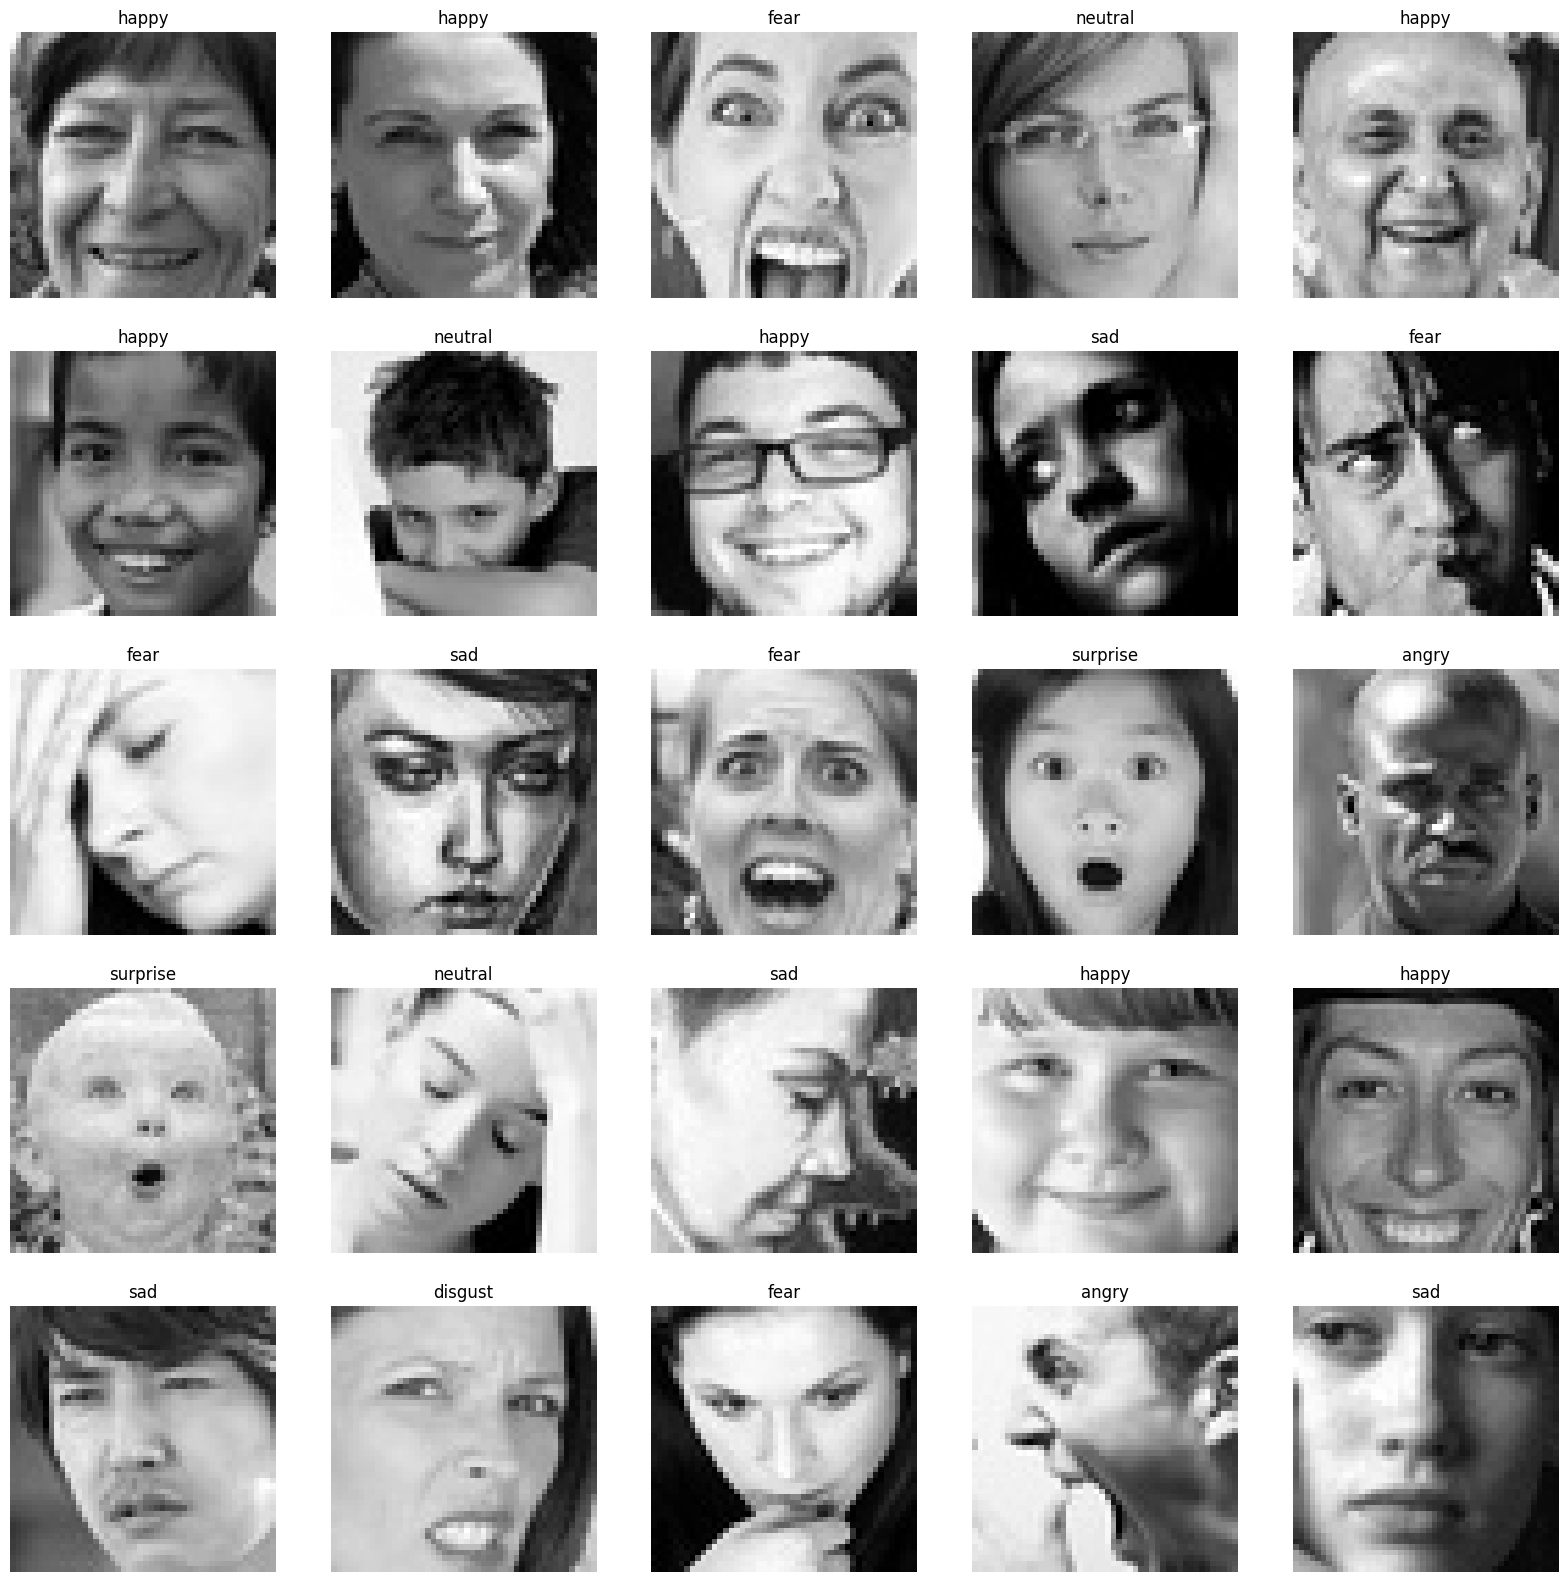

In [12]:
print("Number of images:", len(images))
print("Shape of images array:", images.shape)
print("Number of labels:", len(labels))

# Print sample images and their corresponding labels
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(EMOTIONS[labels[i]])
    plt.axis('off')
plt.show()

In [13]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

In [14]:
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer to prevent overfitting
    layers.Dense(len(EMOTIONS), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 485,255 (1.85 MB)

 Trainable params: 485,255 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
721/721 ━━━━━━━━━━━━━━━━━━━━ 213s 295ms/step - accuracy: 0.2513 - loss: 1.8197 - val_accuracy: 0.3029 - val_loss: 1.6975
Epoch 2/50
721/721 ━━━━━━━━━━━━━━━━━━━━ 219s 304ms/step - accuracy: 0.2903 - loss: 1.7308 - val_accuracy: 0.3696 - val_loss: 1.5862
Epoch 3/50
721/721 ━━━━━━━━━━━━━━━━━━━━ 211s 293ms/step - accuracy: 0.3460 - loss: 1.6392 - val_accuracy: 0.4435 - val_loss: 1.4305
Epoch 4/50
721/721 ━━━━━━━━━━━━━━━━━━━━ 268s 302ms/step - accuracy: 0.4017 - loss: 1.5382 - val_accuracy: 0.4711 - val_loss: 1.3573
Epoch 5/50
721/721 ━━━━━━━━━━━━━━━━━━━━ 218s 302ms/step - accuracy: 0.4324 - loss: 1.4707 - val_accuracy: 0.4801 - val_loss: 1.3191
Epoch 6/50
721/721 ━━━━━━━━━━━━━━━━━━━━ 218s 302ms/step - accuracy: 0.4533 - loss: 1.4294 - val_accuracy: 0.5011 - val_loss: 1.2845
Epoch 7/50
721/721 ━━━━━━━━━━━━━━━━━━━━ 217s 301ms/step - accuracy: 0.4699 - loss: 1.3922 - val_accuracy: 0.5127 - val_loss: 1.2665
Epoch 8/50
721/721 ━━━━━━━━━━━━━━━━━━━━ 208s 289ms/step - accuracy: 0.4788 -

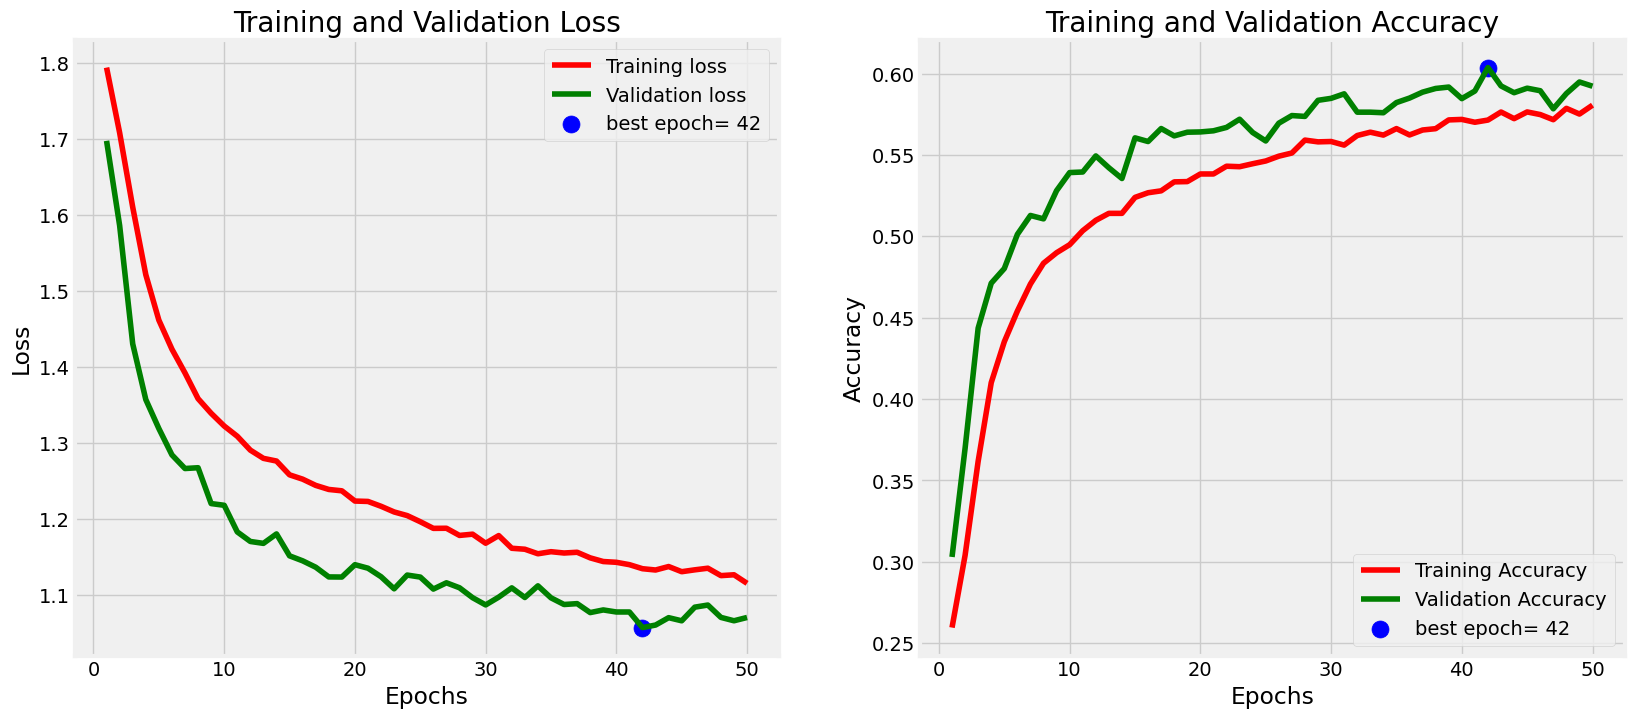

In [17]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [18]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

181/181 - 11s - 62ms/step - accuracy: 0.5922 - loss: 1.0707
Test Loss: 1.0706758499145508
Test Accuracy: 0.5921942591667175


In [19]:
from sklearn.metrics import classification_report

# Make predictions on the test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Print classification report
print(classification_report(y_test, predicted_labels, target_names=EMOTIONS))

181/181 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step
              precision    recall  f1-score   support

    surprise       0.68      0.76      0.71       630
     neutral       0.49      0.67      0.56       987
        fear       0.50      0.26      0.35       875
       angry       0.49      0.53      0.51       829
       happy       0.79      0.84      0.82      1394
         sad       0.51      0.43      0.46       972
     disgust       0.47      0.12      0.19        78

    accuracy                           0.59      5765
   macro avg       0.56      0.52      0.51      5765
weighted avg       0.59      0.59      0.58      5765



181/181 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step


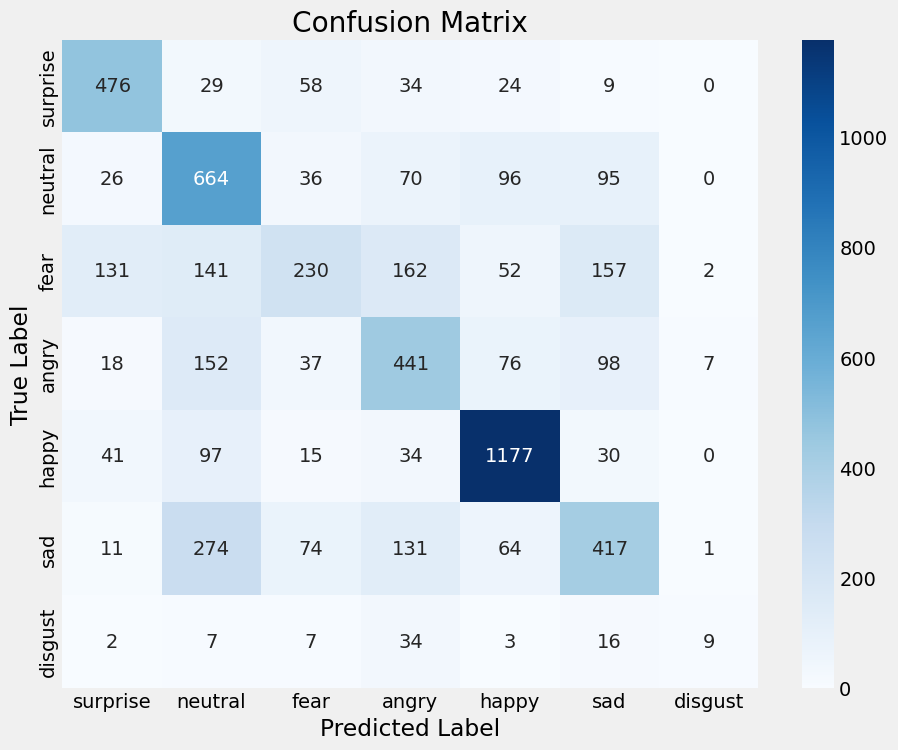

In [20]:
# Make predictions on the test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=EMOTIONS, yticklabels=EMOTIONS)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

181/181 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step


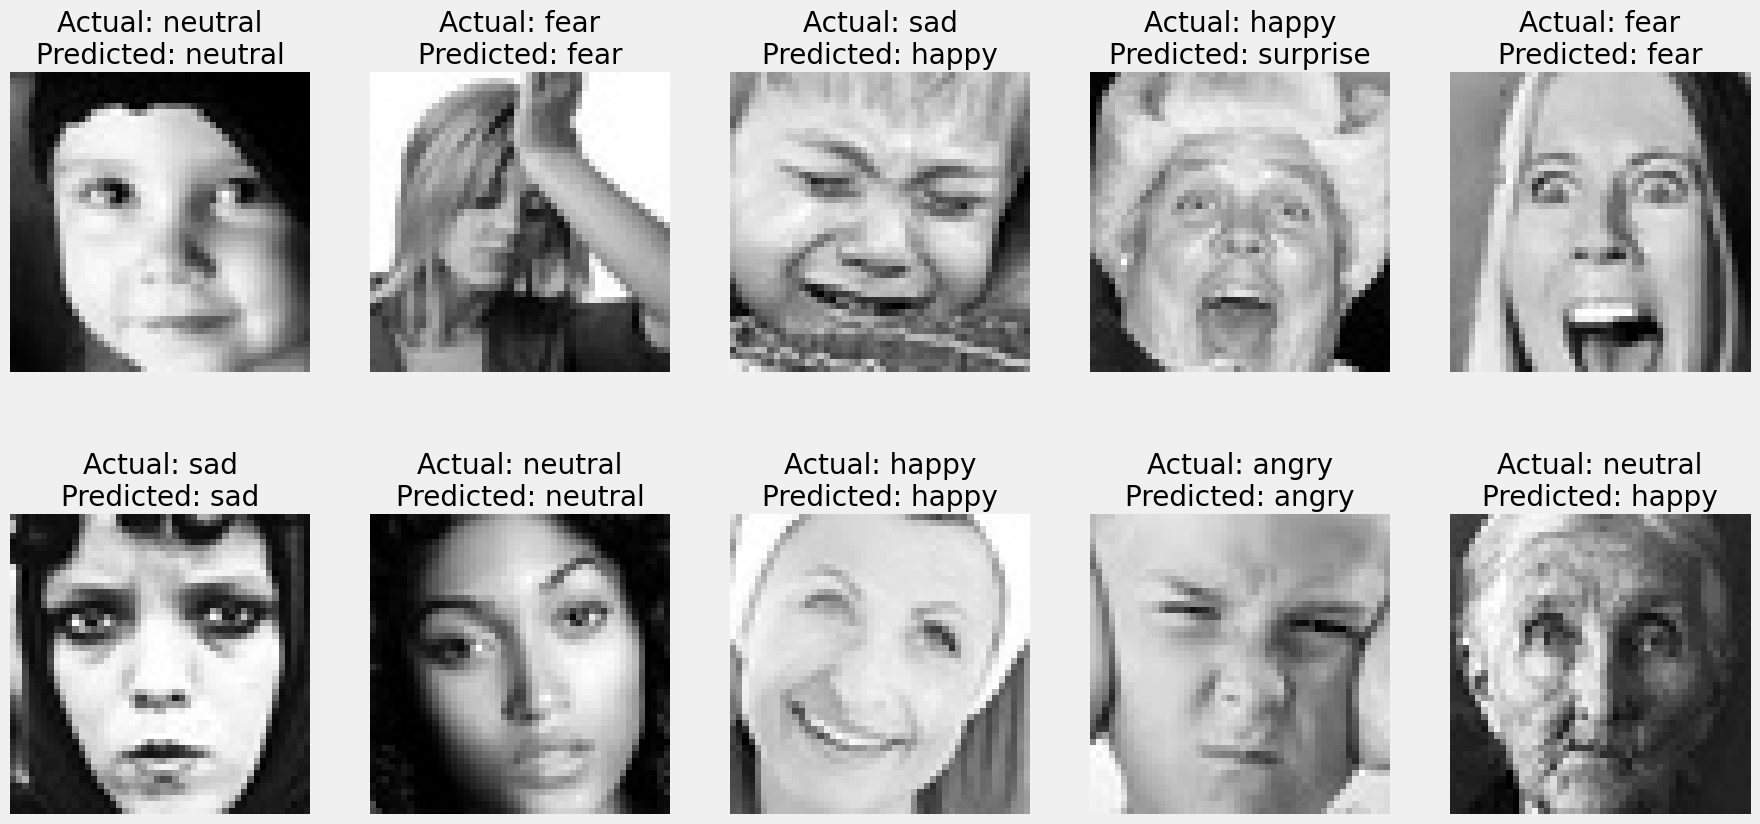

In [21]:
import matplotlib.pyplot as plt

# Make predictions on the test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Function to display images with predicted and actual labels
def display_images(images, actual_labels, predicted_labels, emotions, num_images=10):
    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        # Since the images are grayscale, we reshape them to (48, 48)
        img = images[i].reshape(IMG_SIZE, IMG_SIZE)
        plt.imshow(img, cmap='gray')
        plt.title(f"Actual: {emotions[actual_labels[i]]}\nPredicted: {emotions[predicted_labels[i]]}")
        plt.axis('off')
    plt.show()

# Display the images with predicted and actual labels
display_images(X_test, y_test, predicted_labels, EMOTIONS)